# Forbes Billionaires 2022 EDA

In this EDA, I've analyzed the Forbes Billionaires for the year 2022 dataset. The dataset contain list of people with fortunes valued at least 1 Billion USD. I have taken this dataset from `Kaggle`. You can find it here: https://www.kaggle.com/datasets/jjdaguirre/forbes-billionaires-2022

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Many options are available to download the dataset into `Jupyter`. I used the `opendatasets` helper library to download the files directly from `Kaggle`. Lets do this:

### Importing Essential Libraries

Before continuing further, lets install and import necessary libraries for this Analysis.

In [1]:
!pip install jovian opendatasets plotly --upgrade --quiet

     |████████████████████████████████| 68 kB 6.3 MB/s 
     |████████████████████████████████| 15.3 MB 56.7 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od
import os
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns


Now, downloading the data, and listing the files within the dataset.

In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/jjdaguirre/forbes-billionaires-2022' 
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: keerthivas7
Your Kaggle Key: ··········


100%|██████████| 55.8k/55.8k [00:00<00:00, 26.1MB/s]

The dataset has been downloaded and extracted. Let's verify that the dataset was downloaded into the directory `forbes-billionaires-2022`

In [4]:
os.listdir('forbes-billionaires-2022')

['2022_forbes_billionaires.csv']

Let's Assign data directory to a variable name. Then load the CSV file using Pandas library. I'll be using the name `forbes_df_raw` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [52]:
data_dir = './forbes-billionaires-2022'

In [53]:
forbes_df_raw = pd.read_csv(data_dir + '/2022_forbes_billionaires.csv')

In [ ]:
forbes_df_raw

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "forbes_billionaires"

In [ ]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Data Preparation and Cleaning

Before proceeding further into analysis, we might want to clean and prepare the dataframe.

Let's make a copy of raw data frame and take a look at the dataset. 

In [11]:
forbes_df = forbes_df_raw.copy()

In [12]:
forbes_df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [54]:
forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rank      2600 non-null   int64  
 1   name      2600 non-null   object 
 2   networth  2600 non-null   float64
 3   age       2600 non-null   int64  
 4   country   2600 non-null   object 
 5   source    2600 non-null   object 
 6   industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


So it looks like it has some unwanted index column. Also column `networth` has values containing non numeric characters. Let's clean it by dropping unwanted columns, stripping non-numeric characters and change the type of `networth` column into float.

In [13]:
forbes_df.drop(forbes_df.columns[forbes_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
type(forbes_df['networth'])

pandas.core.series.Series

In [14]:
forbes_df['networth'] = forbes_df['networth'].str.replace('$', '').str.replace('B', '').astype(float)

<ipython-input-14-73850b3b09ed>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  forbes_df['networth'] = forbes_df['networth'].str.replace('$', '').str.replace('B', '').astype(float)


In [55]:
forbes_df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [ ]:
type(forbes_df['networth'])

pandas.core.series.Series

Let's see whether the dataset contain any null values or duplicated values

In [56]:
forbes_df.isnull().sum()

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

In [57]:
forbes_df.duplicated().sum()

0

The dataset contains neither null values nor the duplicate values.

In [ ]:
import jovian

In [58]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Exploratory Analysis and Visualization

Now explore the variables to understand the survey report.



In [59]:
forbes_df.describe()

,rank,networth,age
count,2600.000000,2600.000000,2600.000000
mean,1269.570769,4.860750,64.271923
std,728.146364,10.659671,13.220607
min,1.000000,1.000000,19.000000
25%,637.000000,1.500000,55.000000
50%,1292.000000,2.400000,64.000000
75%,1929.000000,4.500000,74.000000
max,2578.000000,219.000000,100.000000


- The average networth of listed billionaires is 4.8 billion dollars. 
- The maximum networth is 219 billion dollars and minimum is 1 billion dollars. 
- Looks like very minimal number of billionaires is under top 25 percentile. 

### Observations

In [60]:
print('The dataset contains {} rows and {} columns.'.format(forbes_df.shape[0], forbes_df.shape[1]))

The dataset contains 2600 rows and 7 columns.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



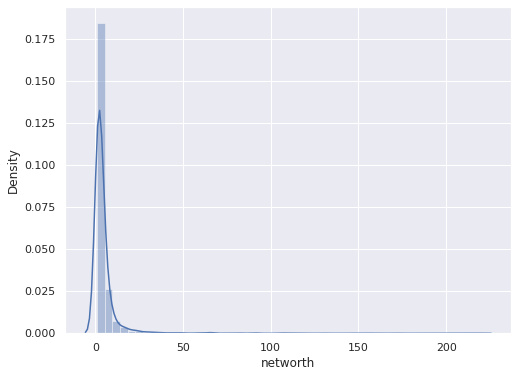

In [61]:
sns.set(font_scale=1)
plt.figure(figsize=(8, 6))
sns.distplot(forbes_df.networth)


- The dataset pdf distributed as right skewed. 

**Let's visualize which countries these billions belongs.**

In [62]:
country_list= forbes_df['country'].value_counts().rename_axis('country').reset_index(name='quantity')

In [63]:
country_list

,country,quantity
0,United States,719
1,China,515
2,India,161
3,Germany,130
4,Russia,81
...,...,...
70,Venezuela,1
71,Portugal,1
72,Algeria,1
73,Eswatini (Swaziland),1


In [64]:
fig = go.Figure(data=go.Choropleth(locations = country_list['country'],
                            locationmode='country names',
                            z = country_list['quantity'],
                            text = country_list['country'],       
                            colorscale = 'Turbo',       
                            autocolorscale=False,
                            marker_line_color='darkgray',
                            marker_line_width=0.5,
                            colorbar_title = 'Number of billionaires',
                        
                          ))

fig.update_layout(
    
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ))
fig.show()

- By looking at color gradient, it seems United States has more number of billionaires. 

**Age distribution of billionaires**


In [65]:
fig = px.histogram(forbes_df, x="age", color="age", title="Age distribution of Billionaires")
fig.show()

- Most of the billionaires are in the age range of 64-65.
- Maximum age of the billionaires is 100 and minimum age is 19.
- Almost age is evenly distributed.

**Now, Let's see number of billionaires based on industry**

In [66]:

industry_list = forbes_df.industry.value_counts().rename_axis('Industry').reset_index(name='quantity')
fig = px.bar(industry_list, x='Industry', y='quantity')

fig.show()

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Asking and Answering Questions

By visualizing the dataset columns, we already get some insights. Let's ask specific questions and answering them.



#### Q1: Who are the Top 10 billionaire in the world 2022? 
Yeah, you are correct! We could know that by just seeing the dataset itself since it is arranged in rankwise. Still its nice to visualize them in graphical way.

In [67]:
top_rank = forbes_df.head(10)


In [68]:
fig = px.bar(top_rank, x='name', y='networth',
             color='networth',
             labels={'networth':'Networth in $ Billions'}, template="plotly_dark", height=600)
fig.show()

#### Q2: Top billionaires in INDIA

In [69]:
from _plotly_utils.colors.plotlyjs import Rainbow

india_df = forbes_df[forbes_df['country']=='India']
df = india_df.sort_values(by = ['networth'],ascending = False).reset_index().head(10)

fig = px.bar(df, x = 'name', y = 'networth', color = 'networth', 
             template="plotly_dark", color_continuous_scale = Rainbow,
             labels= {"networth":"Networth in $ Billion"}
            )

fig.show()

#### Q3: Top Industries that produce Billionaires in INDIA

In [70]:
df1 = india_df['industry'].value_counts().reset_index()
fig = px.pie(df1, values = 'industry', names = 'index',
             color_discrete_sequence = px.colors.sequential.Rainbow,
             labels = {"index":"Industry","industry":"Count"}) 
             
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.show()


#### Q4: What are the top 20 source of billionaires?

Let's answering this question using Treemap.

In [71]:
df_source = forbes_df[['source']].value_counts().head(20).reset_index(name = "count")
df_source

,source,count
0,real estate,148
1,investments,93
2,pharmaceuticals,91
3,diversified,83
4,software,57
5,hedge funds,42
6,private equity,37
7,retail,35
8,chemicals,31
9,manufacturing,29


In [72]:

fig = px.treemap(df_source, path = ['source', 'count'], values = "count",color_continuous_scale=px.colors.sequential.Sunsetdark)
fig.show()


Let us save and upload our work to Jovian before continuing.

In [39]:
import jovian

In [73]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Inferences and Conclusion

- Elon Musk from United States is the new richest person in the world.
- In India, both Ambani and Adhani's networth is almost 1/4 of the sum of all indian billionaire's networth.
- Across the world, Finance and Technological industries of most of the billionaires. But obviously real estate is the top industry in india.

In [48]:
import jovian

In [51]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## References

1. Dataset from https://www.kaggle.com/datasets/jjdaguirre/forbes-billionaires-2022
2. Plotly graph documentation - https://plotly.com/python/

In [ ]:
import jovian

In [50]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
